# 6.0 Support Vector Machine (SVM)

Двумя наиболее распространенными алгоритмами линейной классификации являются **логистическая регрессия (logistic regression), реализованная в классе linear_model.LogisticRegression,**

и 

линейный **метод опорных векторов (linear support vector machines)** или **линейный SVM**, реализованный в классе svm.LinearSVC (SVC расшифровывается как support vector classifier – классификатор опорных векторов).

[Machine Learning Tutorial Python - 10 Support Vector Machine](https://www.youtube.com/watch?v=FB5EdxAGxQg&ab_channel=codebasics)

[Git Support-Vector-Machine-SVM-Example](https://github.com/prvnktech/003-Support-Vector-Machine-SVM-Example)

SVM - линейная модель для классификации. Формула похожа на формулу линейной регрессии. Но теперь вместо того, чтобы просто возвратить взвешенную сумму признаков, мы задаем для прогнозируемого значения порог, равный нулю.

**Для линейных моделей
классификации граница принятия решений (decision boundary) является
линейной функцией аргумента.**

Существует масса алгоритмов обучения линейных моделей. Два критерия задают различия между алгоритмами:

• Измеряемые метрики качества подгонки обучающих данных;

• Факт использования регуляризации и вид регуляризации, если она
используется.

In [65]:
import warnings
warnings.simplefilter("ignore", category=RuntimeWarning)
pd.options.mode.chained_assignment = None 

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

import mglearn

/Users/yuliabezginova/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/Users/yuliabezginova/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


''

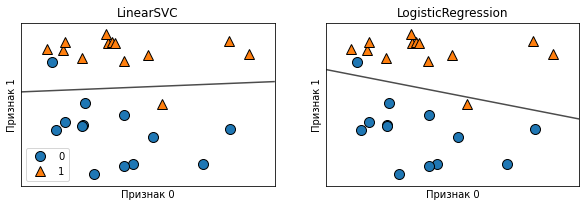

In [64]:
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Признак 0")
    ax.set_ylabel("Признак 1")
    axes[0].legend()
;

#### Границы принятия решений линейного SVM и логистической регрессии для набора данных forge (использовались значения параметров по умолчанию)

На этом рисунке, как и раньше, первый признак набора данных forge отложен по оси x, а второй признак – по оси y. Здесь показаны границы принятия решений, найденные LinearSVC и LogisticRegression соответственно. Они представлены в виде прямых линий, отделяющих область значений, классифицированных как класс 1 (в верхней части графика) от области значений, классифицированных как класс 0 (в нижней части графика). 

Другими словами, любая новая точка данных, которая лежит выше черной линии будет отнесена соответствующей моделью к классу 1, тогда как любая точка, лежащая ниже черной линии, будет отнесена к классу 0.

***Обе модели имеют схожие границы принятия решений. Обратите внимание, что обе модели неправильно классифицировали две точки. По умолчанию обе модели используют L2 регуляризацию, тот же самый метод, который используется в гребневой регрессии.***

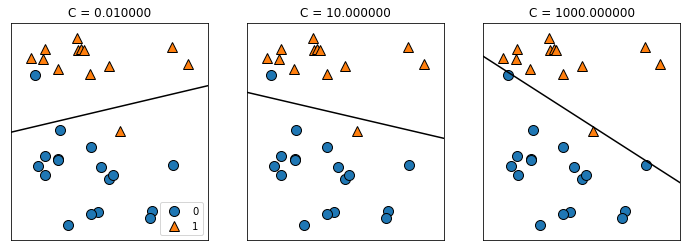

In [66]:
mglearn.plots.plot_linear_svc_regularization()

#### Границы принятия решений линейного SVM с различными значениями C для набора данных forge

- На графике слева показана модель с очень маленьким значением C, соответствующим большой степени регуляризации.
- На центральном графике значение С немного выше и модель в большей степени фокусируется на двух неправильно классифицированных примерах, наклоняя границу принятия решений.
- Наконец, на графике справа очень высокое значение С модели наклоняет границу принятия решений еще сильнее, теперь правильно классифицируя все точки класса 0.

# Iris dataset

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

## 1 - Understaning the dataset

In [2]:
iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df['target'] = iris.target

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [10]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [13]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## Visualizing the data

In [14]:
from matplotlib import pyplot as plt

In [15]:
%matplotlib inline

In [16]:
# creating three different dataframes
df0 = df[df.target==0] # 'setosa'
df1 = df[df.target==1] # 'versicolor'
df2 = df[df.target==2] # 'virginica'

In [17]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


### Creating scatterplots for _sepal_

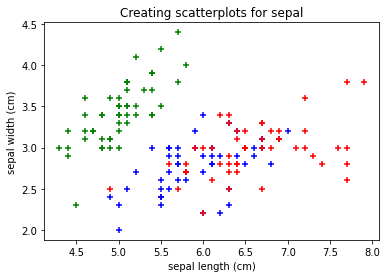

In [27]:
# creating a scatterplot
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Creating scatterplots for sepal')

plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='g', marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='b', marker='+')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='r', marker='+');

### Creating a scatterplot for _petal_

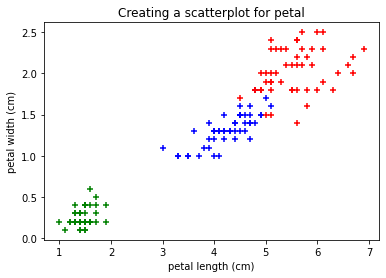

In [26]:
# creating a scatterplot
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Creating a scatterplot for petal')

plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='g', marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='b', marker='+')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='r', marker='+');

## 2 - Training the model

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = df.drop(['target', 'flower_name'], axis='columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [30]:
y = df.target

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [34]:
len(X_train)

112

In [35]:
len(X_test)

38

In [36]:
# importing SVC classifier
from sklearn.svm import SVC

In [67]:
model = SVC(gamma=10)

In [68]:
model.fit(X_train, y_train)

SVC(gamma=10)

In [69]:
print('{}%'.format(round((model.score(X_test, y_test)) * 100)))

97%


***Thank you for going through this project. Your comments are more then welcome to ybezginova2021@gmail.com***

***Best wishes,***

***Yulia***